A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

Graph values are constant, however result is calculated based on the selected values.
Example graph, survival rate based on the lenght names.
If a column is empty, it means that any comment cannot be done on that value.


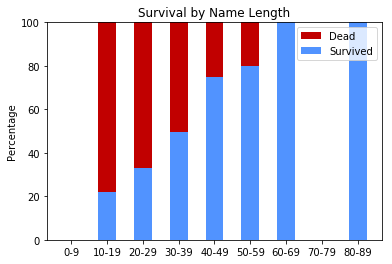

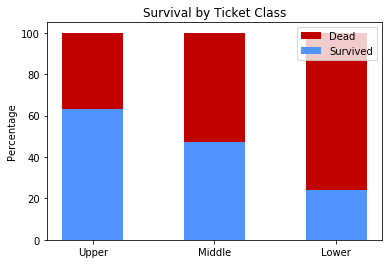

final result based on the selected values
survived_possibility:  4.59294519848
dead_possibility:  95.4070548015


In [2]:
import time
import numpy as np
import pandas as pd
import scipy.stats  as st
import matplotlib.pyplot as plt

from ipywidgets import widgets, HBox, Box
from IPython.display import display

# Variables
def HBox(*pargs, **kwargs):
    box = Box(*pargs, **kwargs)
    box.layout.display = 'flex'
    box.layout.align_items = 'center'
    box.layout.justify_content = 'center'
    return box

df = pd.read_csv('data/train.csv')
df_dead = df.loc[df["Survived"] == 0]
df_survived = df.loc[df["Survived"] == 1]

img_dead = open("img/dead.png", "rb").read()
img_survived = open("img/survived.png", "rb").read()
widget_style = {'description_width' : '150px'}

# Default values of variables
p_class = "Upper"
age = 5
sex = 'Male'
sibsp = 0
parch = 0
fare = '30'
embarked = 'Cherbourg'

# UI controls
i_result = widgets.Image(
            format='png',
            width=200,
            height=200
)

ss_class = widgets.SelectionSlider(
    options=['Upper', 'Middle', 'Lower'],
    value=p_class,
    description='Ticket Class',
    orientation='horizontal',
    readout=True,
    style = widget_style
)

sl_age = widgets.IntSlider(
    value=age,
    min=0,
    max=100,
    description='Age',
    orientation='horizontal',
    readout=True,
    style = widget_style
)

tb_sex = widgets.SelectionSlider(
    options=['Male', 'Female'],
    value=sex,
    description='Sex',
    style = widget_style
)

bit_siblings = widgets.BoundedIntText(
    value=sibsp,
    min=0,
    max=10,
    step=1,
    description='# of Siblings:',
    style = widget_style
)

bit_parents = widgets.BoundedIntText(
    value=parch,
    min=0,
    max=10,
    step=1,
    description='# of Parents:',
    style = widget_style
)

t_fare = widgets.Text(
    placeholder='00.0',
    value=fare,
    description='Ticket Fare',
    style = widget_style
)

dd_port = widgets.Dropdown(
    options=['Cherbourg', 'Queenstown', 'Southampton'],
    value=embarked,
    description='Port of Embarkation',
    style = widget_style
)

display(HBox([ss_class, sl_age, tb_sex]),
        HBox([bit_parents, bit_siblings,t_fare]),
        HBox([dd_port]),
        HBox([i_result]))
i_result.layout.visibility = 'hidden'

# Events
def on_widget_action(w):
    if w.name != 'value':
        return
    
    global p_class
    global age
    global sex
    global sibsp
    global parch
    global fare
    global embarked
    
    owner = w.owner
    value = owner.value
    if owner == ss_class:
        p_class = value
        draw(features[2])
    elif owner == sl_age:
        age = value
        draw(features[5])
    elif owner == tb_sex:
        sex = value
        draw(features[0])
    elif owner == bit_siblings:
        sibsp = value
        draw(features[3])
    elif owner == bit_parents:
        parch = value
        draw(features[4])
    elif owner == t_fare:
        fare = value
        draw(features[6])
    elif owner == dd_port:
        embarked = value
        draw(features[1])
    inspect_case()
        
ss_class.observe(on_widget_action)
sl_age.observe(on_widget_action)
tb_sex.observe(on_widget_action)
bit_siblings.observe(on_widget_action)
bit_parents.observe(on_widget_action)
t_fare.observe(on_widget_action)
dd_port.observe(on_widget_action)

# Learning function
def inspect_case():
    survived_possibility = 1
    dead_possibility = 1
    
    ''' 
    CLASS
    '''
    v_class = 0
    if p_class == "Upper":
        v_class = 1
    elif p_class == "Middle":
        v_class = 2
    elif p_class == "Lower":
        v_class = 3
        
    total_amount_class = len([item for item in df.values if (item[2] == v_class)])
    dead_amount_class = len([item for item in df.values if (item[1] == 0 and item[2] == v_class)])
    survived_amount_class = len([item for item in df.values if (item[1] == 1 and item[2] == v_class)]) 
    
    if total_amount_class == 0: total_amount_class = 1;
    dead_possibility *= dead_amount_class / total_amount_class;
    survived_possibility *= survived_amount_class / total_amount_class
    
    ''' 
    SEX
    '''
    v_sex = ''
    if sex == "Male":
        v_sex = 'male'
    elif sex == "Female":
        v_sex = 'female'
    
    total_amount_sex = len([item for item in df.values if (item[4] == v_sex)])
    dead_amount_sex = len([item for item in df.values if (item[1] == 0 and item[4] == v_sex)])
    survived_amount_sex = len([item for item in df.values if (item[1] == 1 and item[4] == v_sex)])
    
    if total_amount_sex == 0: total_amount_sex = 1;
    dead_possibility *= dead_amount_sex / total_amount_sex;
    survived_possibility *= survived_amount_sex / total_amount_sex
    
    ''' 
    SIBSP
    '''
    total_amount_sibsp = len([item for item in df.values if (item[6] == sibsp)])
    dead_amount_sibsp = len([item for item in df.values if (item[1] == 0 and item[6] == sibsp)])
    survived_amount_sibsp = len([item for item in df.values if (item[1] == 1 and item[6] == sibsp)])
    
    if total_amount_sibsp == 0: total_amount_sibsp = 1;
    dead_possibility *= dead_amount_sibsp / total_amount_sibsp;
    survived_possibility *= survived_amount_sibsp / total_amount_sibsp
    
    ''' 
    PARCH
    '''
    total_amount_parch = len([item for item in df.values if (item[7] == parch)])
    dead_amount_parch = len([item for item in df.values if (item[1] == 0 and item[7] == parch)])
    survived_amount_parch = len([item for item in df.values if (item[1] == 1 and item[7] == parch)])
    
    if total_amount_parch == 0: total_amount_parch = 1;
    dead_possibility *= dead_amount_parch / total_amount_parch;
    survived_possibility *= survived_amount_parch / total_amount_parch
    
    ''' 
    EMBARKED
    '''
    v_embarked = ''
    if embarked == "Cherbourg":
        v_embarked = 'C'
    elif embarked == "Queenstown":
        v_embarked = 'Q'
    elif embarked == "Southampton":
        v_embarked = 'S'
        
    total_amount_embarked = len([item for item in df.values if (item[11] == v_embarked)])
    dead_amount_embarked = len([item for item in df.values if (item[1] == 0 and item[11] == v_embarked)])
    survived_amount_embarked = len([item for item in df.values if (item[1] == 1 and item[11] == v_embarked)])
    
    if total_amount_embarked == 0: total_amount_embarked = 1;
    dead_possibility *= dead_amount_embarked / total_amount_embarked;
    survived_possibility *= survived_amount_embarked / total_amount_embarked;
        
    '''
    AGE
    '''
    mean_age_dead = df_dead["Age"].mean()
    std_age_dead  = df_dead["Age"].std()
    
    mean_age_survived = df_survived["Age"].mean()
    std_age_survived  = df_survived["Age"].std()
  
    dead_possibility *= st.norm.pdf(age,  loc = mean_age_dead,  scale = std_age_dead)
    survived_possibility *= st.norm.pdf(age,  loc = mean_age_survived,  scale = std_age_survived)
    
    '''
    FARE
    '''
    mean_fare_dead = df_dead["Fare"].mean()
    std_fare_dead  = df_dead["Fare"].std()
    
    mean_fare_survived = df_survived["Fare"].mean()
    std_fare_survived  = df_survived["Fare"].std()
  
    dead_possibility *= st.norm.pdf(int(fare),  loc = mean_fare_dead,  scale = std_fare_dead)
    survived_possibility *= st.norm.pdf(int(fare),  loc = mean_fare_survived,  scale = std_fare_survived)
    
    
    # Final result
    total_possibility = survived_possibility + dead_possibility
    print("final result based on the selected values")
    print("survived_possibility: ", survived_possibility / total_possibility * 100)
    print("dead_possibility: ", dead_possibility / total_possibility * 100)
    
    if survived_possibility > dead_possibility:
        i_result.value = img_survived
    else: 
        i_result.value = img_dead
    i_result.layout.visibility = 'visible'

# Plots
features = [
    ['Survival by Sex', 'Sex', [['Male', 'male'], ['Female','female']]],
    ['Survival by Embarked', 'Embarked', [['Cherbourg', 'C'], ['Queenstown', 'Q'], ['Southampton', 'S']]],
    ['Survival by Ticket Class', 'Pclass', [['Upper', 1], ['Middle', 2],['Lower', 3]]],
    ['Survival by Siblings', 'SibSp', [['0', 0], ['1', 1], ['2', 2], ['3', 3], ['4', 4], ['5', 5], ['6', 6], ['7', 7], ['8', 8]]],
    ['Survival by Parents', 'Parch', [['0', 0], ['1', 1], ['2', 2], ['3', 3], ['4', 4], ['5', 5], ['6', 6], ['7', 7], ['8', 8]]],
    ['Survival by Age', 'Age', [['0-9', 1], ['10-19', 2], ['20-29', 3], ['30-39', 4], ['40-49', 5], ['50-59', 6], ['60-69', 7], ['70-79', 8], ['80-89', 9]]],
    ['Survival by Fare', 'Fare', [['0-9', 1], ['10-19', 2], ['20-29', 3], ['30-39', 4], ['40-49', 5], ['50-59', 6], ['60-69', 7], ['70-79', 8], ['80-89', 9]]],
    ['Survival by Name Length', 'Name', [['0-9', 1], ['10-19', 2], ['20-29', 3], ['30-39', 4], ['40-49', 5], ['50-59', 6], ['60-69', 7], ['70-79', 8], ['80-89', 9]]]
]

def draw(feature):    
    title = feature[0]
    key = feature[1]
    variables = np.array(feature[2])
    
    variable_lenght = len(variables)
    variable_names = variables[:,0]
    variable_values = variables[:,1]
    
    percentages = np.zeros(shape=(variable_lenght,2))
    for i, variable_value in enumerate(variable_values):
        if variable_value.isdigit():
            variable_value = int(variable_value)
        
        if(key == "Name"):
            survived_amount = len([item for item in zip(df[key], df['Survived']) if (len(item[0]) >= (variable_value - 1) * 10 and len(item[0]) < variable_value * 10) and item[1] == 1])
            dead_amount = len([item for item in zip(df[key], df['Survived']) if (len(item[0]) >= (variable_value - 1) * 10 and len(item[0]) < variable_value * 10) and item[1] == 0])
        elif(key == "Age" or key == "Fare"):
            survived_amount = len([item for item in zip(df[key], df['Survived']) if (item[0] >= (variable_value - 1) * 10 and item[0] < variable_value * 10) and item[1] == 1])
            dead_amount = len([item for item in zip(df[key], df['Survived']) if (item[0] >= (variable_value - 1) * 10 and item[0] < variable_value * 10) and item[1] == 0])
        else:
            survived_amount = len([item for item in zip(df[key], df['Survived']) if item[0] == variable_value and item[1] == 1])
            dead_amount = len([item for item in zip(df[key], df['Survived']) if item[0] == variable_value and item[1] == 0])
        
        total_amount = survived_amount + dead_amount
        
        if total_amount == 0:
            total_amount = 1
        
        percentages[i][0] = survived_amount/total_amount * 100
        percentages[i][1] = dead_amount/total_amount * 100
   
    fig, ax = plt.subplots()
    ind = np.arange(variable_lenght)
    width = 0.5
    
    survived_means = percentages[:,0]
    dead_means = percentages[:,1]
    
    rects_survived = ax.bar(ind, survived_means, width, color='#5193ff')
    rects_dead = ax.bar(ind, dead_means, width, bottom = survived_means, color='#c10000')

    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.set_xticks(ind + width / 2 - width / 2)
    ax.set_xticklabels(variable_names)
    ax.legend((rects_dead[0], rects_survived[0]), ('Dead', 'Survived'))
    
    plt.show()
    
print("Graph values are constant, however result is calculated based on the selected values.")
print("Example graph, survival rate based on the lenght names.")
print("If a column is empty, it means that any comment cannot be done on that value.")
draw(features[7])